In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import h5py
import scipy

In [5]:
# Simple DNN model with Keras
x_input = tf.keras.Input(shape=(4,))
x = tf.keras.layers.Dense(64, activation="relu")(x_input)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(1, activation="softmax")(x)

model = tf.keras.Model(inputs=x_input, outputs=x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2433 (9.50 KB)
Trainable params: 2433 (9.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


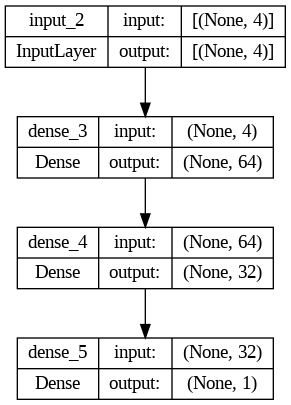

In [9]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

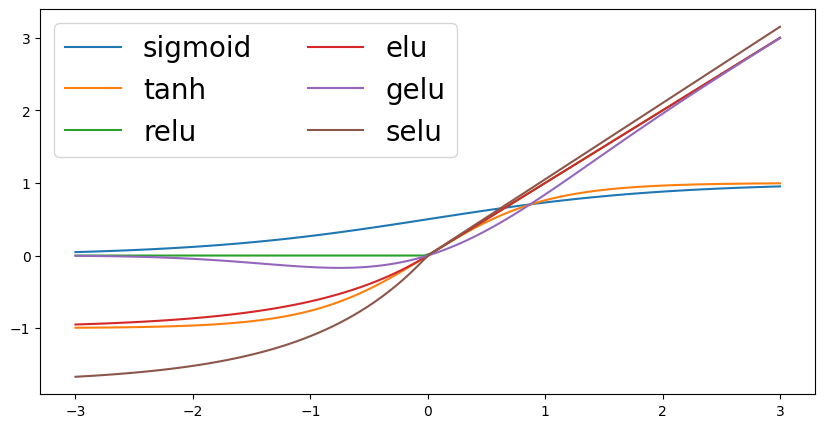

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
xspace = np.linspace(-3, 3, 100)
for fname in 'sigmoid','tanh','relu', 'elu', 'gelu', 'selu':
    f = getattr(tf.keras.activations, fname)
    ax.plot(xspace, f(xspace), label=fname)
ax.legend(ncol=2, fontsize=20);

In [11]:
# Synthetic data
test_input = np.array([[1, 2, 3, 4]])
model(test_input)
#test_input = np.array([[1, 2, 3, 4], [1, 2, 3, 4]])
#model(test_input)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [ ]:
# Save the model
model.save('model_weights.h5')

In [ ]:
# Reload the model
reconstructed_model = tf.keras.models.load_model("model_weights.h5")
reconstructed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# simple lambda function as loss
var = tf.Variable(starting_point := 1.0)
loss = lambda: (var ** 2)

def minimize_with_history(loss, opt, nepochs):
    history_steps = [(var.numpy(), var.numpy() ** 2)]
    for epoch in range(nepochs):
        opt.minimize(loss, [var])
        history_steps.append([var.numpy(), loss()])
    return np.asarray(history_steps)

# reasonable learning rate
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
history_steps1 = minimize_with_history(loss, opt, 50)

# huge learning_rate
var = tf.Variable(starting_point)
opt = tf.keras.optimizers.SGD(learning_rate=0.9)
history_steps2 = minimize_with_history(loss, opt, 50)

# tiny learning_rate
var = tf.Variable(starting_point)
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
history_steps3 = minimize_with_history(loss, opt, 50)

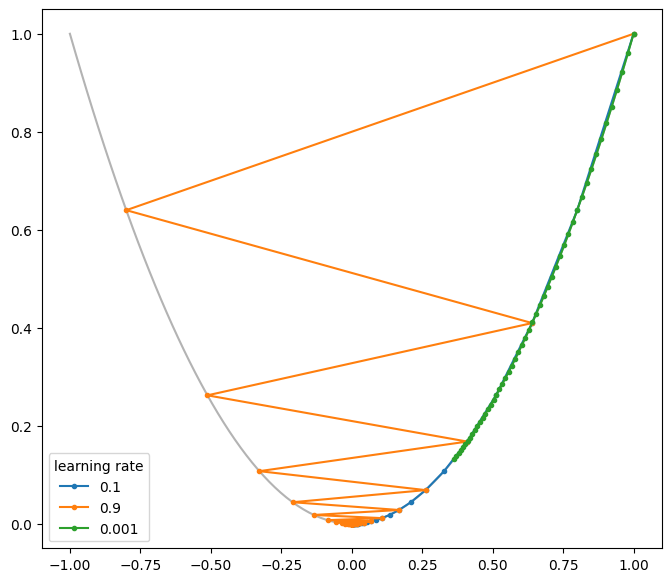

In [ ]:
fig, ax = plt.subplots(figsize=(8, 7))
xspace = np.linspace(-1, 1, 100)
ax.plot(xspace, xspace ** 2, color='0.7')
ax.plot(*history_steps1.T, '.-', label='0.1')
ax.plot(*history_steps2.T, '.-', label='0.9')
ax.plot(*history_steps3.T, '.-', label='0.001')
ax.legend(title='learning rate', loc=0);

In [ ]:
data_x = np.arange(0, 1000.)
data_y = data_x * 2 + 1  # true-y
data_y = np.random.normal(data_y, data_y * 0.1 + 0.1)

class FirstModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.m = tf.Variable(5.)  # random numbers (use floats)
        self.q = tf.Variable(10.)

    def call(self, x):
        return self.m * x + self.q

model = FirstModel()

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.000001),
    loss=tf.keras.losses.mean_squared_error,
)
model.fit(data_x, data_y, epochs=5, batch_size=100)

Epoch 1/5
10/10 [==============================] - 0s 2ms/step - loss: 337692.9062
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 13355.8438
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 13284.3193
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 13198.7158
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 13283.4619


32/32 [==============================] - 0s 1ms/step


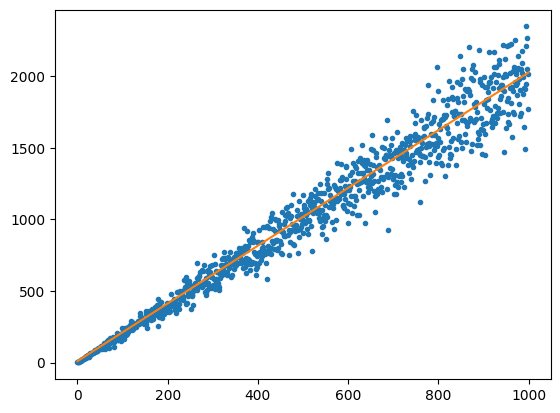

In [ ]:
plt.plot(data_x, data_y, '.')
plt.plot(data_x, model.predict(data_x))